<a href="https://colab.research.google.com/github/sahupra1357/LLMAgents/blob/main/Bedrock_setup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!python3 -m pip install -qU boto3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.6/139.6 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 59.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.4/84.4 kB 6.5 MB/s eta 0:00:00


In [2]:
import os
from google.colab import userdata
import boto3
os.environ["AWS_ACCESS_KEY"] = userdata.get('AWS_ACCESS_KEY')
os.environ["AWS_SECRET_KEY"] = userdata.get('AWS_SECRET_KEY')
os.environ["AWS_REGION"] = userdata.get('AWS_REGION')
AWS_ACCESS_KEY = os.getenv('AWS_ACCESS_KEY')
AWS_SECRET_KEY = os.getenv('AWS_SECRET_KEY')
AWS_REGION = os.getenv('AWS_REGION')


In [3]:
boto3_bedrock = boto3.client(
    service_name="bedrock",
    region_name=AWS_REGION,
    aws_access_key_id=AWS_ACCESS_KEY,
    aws_secret_access_key=AWS_SECRET_KEY,
)

In [4]:
[models['modelId'] for models in boto3_bedrock.list_foundation_models()['modelSummaries']]

['amazon.titan-embed-text-v2:0',
 'amazon.nova-pro-v1:0',
 'amazon.nova-lite-v1:0',
 'amazon.nova-micro-v1:0',
 'anthropic.claude-3-5-sonnet-20240620-v1:0',
 'anthropic.claude-3-7-sonnet-20250219-v1:0',
 'anthropic.claude-3-haiku-20240307-v1:0:200k',
 'anthropic.claude-3-haiku-20240307-v1:0',
 'anthropic.claude-3-5-sonnet-20241022-v2:0',
 'anthropic.claude-3-5-haiku-20241022-v1:0',
 'deepseek.r1-v1:0',
 'meta.llama3-1-8b-instruct-v1:0:128k',
 'meta.llama3-1-8b-instruct-v1:0',
 'meta.llama3-1-70b-instruct-v1:0:128k',
 'meta.llama3-1-70b-instruct-v1:0',
 'meta.llama3-1-405b-instruct-v1:0',
 'meta.llama3-2-11b-instruct-v1:0',
 'meta.llama3-2-90b-instruct-v1:0',
 'meta.llama3-2-1b-instruct-v1:0',
 'meta.llama3-2-3b-instruct-v1:0',
 'meta.llama3-3-70b-instruct-v1:0']

## Amazon Nova

In [5]:
import boto3
import botocore
import json

bedrock_runtime  = boto3.client(
    service_name="bedrock-runtime",
    region_name=AWS_REGION,
    aws_access_key_id=AWS_ACCESS_KEY,
    aws_secret_access_key=AWS_SECRET_KEY,
)

In [6]:
# If you'd like to try your own prompt, edit this parameter!
prompt_data = """Command: Write me a blog about making strong business decisions as a leader.

Blog:
"""

In [7]:
try:

    body = json.dumps(
        {
            "messages": [{"role": "user", "content": [{"text": prompt_data}]}],
            "inferenceConfig": {
                "max_new_tokens": 100,
                "top_p": 0.9,
                "top_k": 20,
                "temperature": 0.7
            }
        }
    )
    modelId = "us.amazon.nova-lite-v1:0" # amazon.nova-lite-v1:0
    accept = "application/json"
    contentType = "application/json"

    response = bedrock_runtime.invoke_model(
        body=body, modelId=modelId, accept=accept, contentType=contentType
    )
    response_body = json.loads(response.get("body").read())

    print(response_body["output"]["message"]["content"][0]['text'])

except botocore.exceptions.ClientError as error:

    if error.response['Error']['Code'] == 'AccessDeniedException':
           print(f"\x1b[41m{error.response['Error']['Message']}\
                \nTo troubeshoot this issue please refer to the following resources.\
                 \nhttps://docs.aws.amazon.com/IAM/latest/UserGuide/troubleshoot_access-denied.html\
                 \nhttps://docs.aws.amazon.com/bedrock/latest/userguide/security-iam.html\x1b[0m\n")

    else:
        raise error

**Making Strong Business Decisions as a Leader**

In the fast-paced world of business, making strong decisions is a cornerstone of effective leadership. Leaders are often at the helm, navigating their organizations through uncharted waters, and the decisions they make can significantly impact their company's success. Here are some key strategies to help you make strong business decisions as a leader.

### 1. Gather Comprehensive Information

One of the most critical aspects of making strong decisions is ensuring you have all the necessary information. This


## Stability Stable Diffusion XL

In [8]:
bedrock_runtime_us1  = boto3.client(
    service_name="bedrock-runtime",
    region_name="us-east-1",
    aws_access_key_id=AWS_ACCESS_KEY,
    aws_secret_access_key=AWS_SECRET_KEY,
)

In [9]:
prompt_data = "a landscape with trees"
body = json.dumps({
    "text_prompts": [{"text": prompt_data}],
    "cfg_scale": 10,
    "seed": 20,
    "steps": 50
})
modelId = "stability.stable-diffusion-xl-v1"
accept = "application/json"
contentType = "application/json"

try:

    response = bedrock_runtime_us1.invoke_model(
        body=body, modelId=modelId, accept=accept, contentType=contentType
    )
    response_body = json.loads(response.get("body").read())

    print(response_body["result"])
    print(f'{response_body.get("artifacts")[0].get("base64")[0:80]}...')

except botocore.exceptions.ClientError as error:

    if error.response['Error']['Code'] == 'AccessDeniedException':
           print(f"\x1b[41m{error.response['Error']['Message']}\
                \nTo troubeshoot this issue please refer to the following resources.\
                 \nhttps://docs.aws.amazon.com/IAM/latest/UserGuide/troubleshoot_access-denied.html\
                 \nhttps://docs.aws.amazon.com/bedrock/latest/userguide/security-iam.html\x1b[0m\n")

    else:
        raise error

success
iVBORw0KGgoAAAANSUhEUgAABAAAAAQACAIAAADwf7zUAAABYmVYSWZNTQAqAAAACAAGAQAABAAAAAEA...


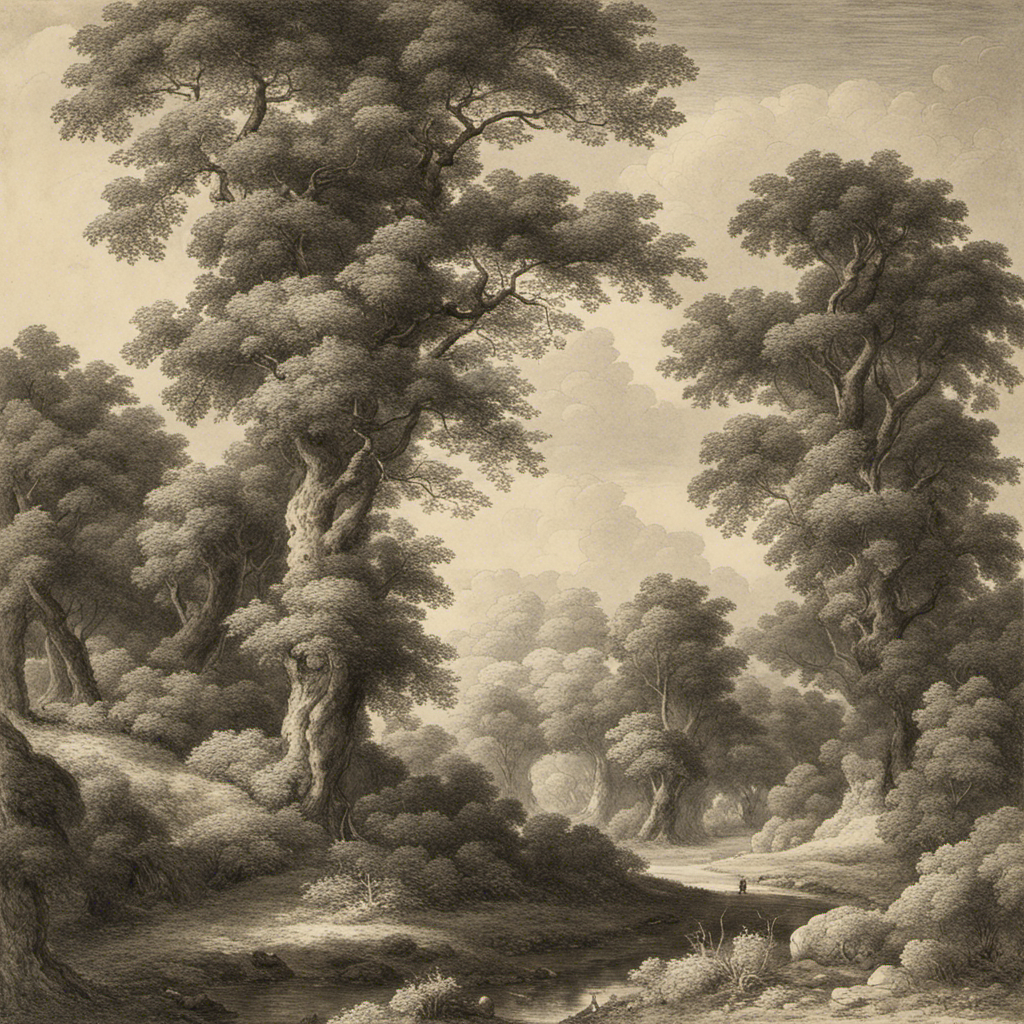

In [10]:
%pip install pillow
import base64
import io
from PIL import Image

base_64_img_str = response_body.get("artifacts")[0].get("base64")
image = Image.open(io.BytesIO(base64.decodebytes(bytes(base_64_img_str, "utf-8"))))
image

## Generate streaming output

In [12]:
from IPython.display import clear_output, display, display_markdown, Markdown
prompt_data = """Command: Write me a blog about making strong business decisions as a leader.

Blog:
"""

body = json.dumps({"inputText": prompt_data, "textGenerationConfig" : {"maxTokenCount": 100, "topP":0.95, "temperature":0.2}})
modelId = "amazon.titan-text-express-v1" # "amazon.titan-tg1-large"
accept = "application/json"
contentType = "application/json"

try:

    response = bedrock_runtime_us1.invoke_model_with_response_stream(
        body=body, modelId=modelId, accept=accept, contentType=contentType
    )
    stream = response.get('body')
    output = []

    if stream:
        for event in stream:
            chunk = event.get('chunk')
            if chunk:
                chunk_obj = json.loads(chunk.get('bytes').decode())
                text = chunk_obj['outputText']
                display_markdown(Markdown(print(text, end='')))

except botocore.exceptions.ClientError as error:

    if error.response['Error']['Code'] == 'AccessDeniedException':
           print(f"\x1b[41m{error.response['Error']['Message']}\
                \nTo troubeshoot this issue please refer to the following resources.\
                 \nhttps://docs.aws.amazon.com/IAM/latest/UserGuide/troubleshoot_access-denied.html\
                 \nhttps://docs.aws.amazon.com/bedrock/latest/userguide/security-iam.html\x1b[0m\n")

    else:
        raise error

Leaders are responsible for making critical decisions that can impact the success of their organizations. Making strong business decisions requires a combination of analytical thinking, problem-solving skills, and a clear understanding of the organization's goals and objectives.

One of the most important factors in making strong business decisions is to gather all relevant information. This includes data, market trends, customer feedback, and internal metrics. Leaders should be able to analyze this information and identify patterns and trends that can help them make informed decisions.



## Anthropic Claude (messages API)

In [18]:
prompt_data = """Write me a 500 word paragraph about making strong business decisions as a leader.
"""

In [19]:
messages_API_body = {
    "anthropic_version": "bedrock-2023-05-31",
    "max_tokens": int(50/0.75),
    "messages": [
        {
            "role": "user",
            "content": [
                {
                    "type": "text",
                    "text": prompt_data
                }
            ]
        }
    ]
}

In [21]:
from IPython.display import clear_output, display, display_markdown, Markdown

body = json.dumps(messages_API_body)
modelId = "anthropic.claude-3-haiku-20240307-v1:0"  # (Change this to try different model versions)
accept = "application/json"
contentType = "application/json"

try:

    response = bedrock_runtime_us1.invoke_model_with_response_stream(
        body=body, modelId=modelId, accept=accept, contentType=contentType
    )

    stream = response.get('body')


    output = []

    if stream:
        for event in stream:
            chunk = event.get('chunk')
            if chunk:
                chunk_obj = json.loads(chunk.get('bytes').decode())
                if 'delta' in chunk_obj:
                    delta_obj = chunk_obj.get('delta', None)
                    if delta_obj:
                        text = delta_obj.get('text', None)
                        print(text,end='')
                        if not text :
                            break
                    # output.append(text[0]) if type(text) is list and len(text)>0 else output.append('')
                    # display_markdown(Markdown(text))

except botocore.exceptions.ClientError as error:

    if error.response['Error']['Code'] == 'AccessDeniedException':
           print(f"\x1b[41m{error.response['Error']['Message']}\
                \nTo troubeshoot this issue please refer to the following resources.\
                 \nhttps://docs.aws.amazon.com/IAM/latest/UserGuide/troubleshoot_access-denied.html\
                 \nhttps://docs.aws.amazon.com/bedrock/latest/userguide/security-iam.html\x1b[0m\n")

    else:
        raise error

As a business leader, making strong and well-informed decisions is crucial to the success and growth of your organization. In today's fast-paced and highly competitive market, the ability to make sound decisions can be the difference between thriving and merely surviving. Strong business decisions are not only essential for immediate success but also lay theNone

## Generate embeddings

In [22]:
prompt_data = "Amazon Bedrock supports foundation models from industry-leading providers such as \
AI21 Labs, Anthropic, Stability AI, and Amazon. Choose the model that is best suited to achieving \
your unique goals."

In [24]:
body = json.dumps({"inputText": prompt_data})
#modelId = "amazon.titan-embed-g1-text-02"  # (Change this to try different embedding models)
modelId = "amazon.titan-embed-text-v2:0"  # (Change this to try different embedding models)
accept = "application/json"
contentType = "application/json"

try:

    response = bedrock_runtime.invoke_model(
        body=body, modelId=modelId, accept=accept, contentType=contentType
    )
    response_body = json.loads(response.get("body").read())

    embedding = response_body.get("embedding")
    print(f"The embedding vector has {len(embedding)} values\n{embedding[0:3]+['...']+embedding[-3:]}")

except botocore.exceptions.ClientError as error:

    if error.response['Error']['Code'] == 'AccessDeniedException':
           print(f"\x1b[41m{error.response['Error']['Message']}\
                \nTo troubeshoot this issue please refer to the following resources.\
                 \nhttps://docs.aws.amazon.com/IAM/latest/UserGuide/troubleshoot_access-denied.html\
                 \nhttps://docs.aws.amazon.com/bedrock/latest/userguide/security-iam.html\x1b[0m\n")

    else:
        raise error

The embedding vector has 1024 values
[-0.08286015689373016, 0.034856222569942474, -0.030087873339653015, '...', -0.025296831503510475, -0.03928923234343529, -0.012503424659371376]
